A notebook to test calculating of SNR, SSIM, and MSE for a filter using a number of randomly generated additive noise problems

# Setup
Here we import the libraries we need

In [1]:
import matplotlib.pyplot as plt # plotting and showing images
import numpy as np # handling arrays
from skimage.io import imread # reading images
from skimage.measure import compare_ssim as ssim # structural similarity
mse = lambda img1, img2: np.sum(np.power(img1-img2,2))

# Load and Show Phantom

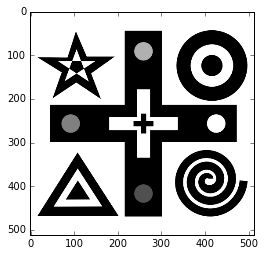

In [2]:
%matplotlib inline
d=np.mean(imread('data/testpattern.png'),2)
plt.imshow(d, cmap= 'gray')

# Tasks
Evaluate a number of different filters using different noise levels and determine which works the best under which circumstances. The example is done for a uniform filter, and you job is to add 

 1. gaussian
 2. median 
 3. wavelet (advanced) 
 4. anisotropic diffusion (expert)

In [3]:

scales = [0.1, 0.5, 1, 10, 20, 100];

Ntests = 10;

# initialize arrays for results
mse1 = np.zeros((len(scales), Ntests), dtype = np.float32)
ssim1 = np.zeros((len(scales), Ntests), dtype = np.float32)
from scipy.ndimage.filters import uniform_filter
current_filter = lambda img: uniform_filter(img, 5)

for i, c_scale in enumerate(scales):
    for j in range(Ntests):
        x = current_filter(d+c_scale*np.random.uniform(-c_scale, c_scale, size = d.shape))
        mse1[i,j]=mse(d,x);
        ssim1[i,j]=ssim(d,x);    
    # Add some lines here to display the latest image in a subplot

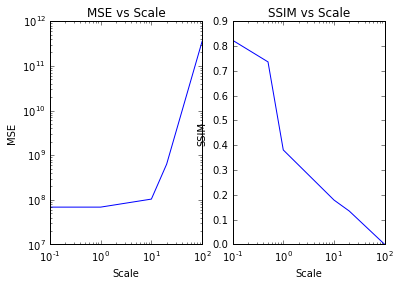

In [4]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.loglog(scales,np.mean(mse1,1)) # Add annotations for the plot and axes
ax1.set_title('MSE vs Scale')
ax1.set_xlabel('Scale')
ax1.set_ylabel('MSE')

ax2.semilogx(scales,np.mean(ssim1,1))
ax2.set_title('SSIM vs Scale')
ax2.set_xlabel('Scale')
ax2.set_ylabel('SSIM')

In [ ]:
# make a version of the plot showing SNR instead of scale

## Test run for filter 2

### repeat the code from filter 1 

```